#Netflix Business Case Study

In [ ]:
!gdown 17h0vm_rPvBHyr5TGK0dQRiyCgV2_PijS

Downloading...
From: https://drive.google.com/uc?id=17h0vm_rPvBHyr5TGK0dQRiyCgV2_PijS
To: /content/netflix.csv
100% 3.43M/3.43M [00:00<00:00, 53.8MB/s]


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Will convert the data type whenever it is required. eg. date_added to column to datetime datatype

In [ ]:
df.shape

(8807, 12)

Inference:
Total rows : 8807
Total columns : 12

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,8807,4529,Unknow,2634
cast,8807,7693,Unknow,825
country,8807,749,United States,2818
rating,8807,14,TV-MA,3214
duration,8807,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


In [ ]:
df.index

RangeIndex(start=0, stop=8807, step=1)

In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,749
date_added,1719
release_year,74
rating,14
duration,220


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
print(df.shape[0])
df[df.isna().sum(axis = 1) > 0].shape[0]

8807


3475

In [ ]:
3475/8807 * 100

39.45724991484047

Inference:

*   3475 row (39.45 %) of the data has NaN values. Since it is greater then 5% we cannot remove the rows and we should see the alternative ways for the filling the NaN rows for each column.
*   8807 rows, 12 columns
*   All the show_id and title present in the dataframe are unique
*   Director, Case, Country, listed_in has multiple values for each title
*   Most of the datatypes are object, will cast to the required datatype when ever it is required.








##5. Missing Value & Outlier check (Treatment optional)


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Filling NaN values for DURATION Column

df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Inference:
I think, 'duration' value is mistakenly set to 'rating' column. So updating the duration column with correct value which is in rating column.

In [ ]:
df['rating_1'] = df['rating']

In [ ]:
df['rating'].iloc[df[df['duration'].isna()].index] = np.NaN

<ipython-input-172-6d3c138fb66f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].iloc[df[df['duration'].isna()].index] = np.NaN


In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_1
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",74 min
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84 min
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,NaN,Movies,The comic puts his trademark hilarious/thought...,66 min


In [ ]:
df['duration'].fillna(df['rating_1'], inplace = True)

In [ ]:
df.drop('rating_1', axis=1,  inplace = True)

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# Filling NaN values for DURATION Column

df['rating'].isna().sum()

7

In [ ]:
df['rating'].value_counts().idxmax()

'TV-MA'

In [ ]:
df['rating'].fillna(df['rating'].value_counts().idxmax(), inplace = True)
df['rating'].isna().sum()

0

In [ ]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ã...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['date_added'].fillna(df['release_year'].astype(str)+"-12-31", inplace=True)

In [ ]:
df['date_added'].isna().sum()

0

In [ ]:
df['director'].fillna('Unknow', inplace = True)

In [ ]:
df['cast'].fillna('Unknow', inplace = True)

In [ ]:
df['country'].fillna('Unknow', inplace = True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Insights: Since we can't removed the all the NaN rows,

*   Updated the Nan value of the duration column with the rating column value since it has duration value for NaN values
*   Updated the NaN value of the director, cast, country column to 'unknow'
*   Updated the NaN value of the date_added column to '31-12' with release year
*   Updated the NaN value of the rating column with the rating with max count





In [ ]:
# create director dataframe

director_df = pd.concat([df['show_id'], df['director'].str.split(', ',expand=True)], axis=1)
director_df = pd.melt(director_df, id_vars = 'show_id', value_name='Director')\
.drop('variable', axis = 1).dropna()
director_df

,show_id,Director
0,s1,Kirsten Johnson
1,s2,Unknow
2,s3,Julien Leclercq
3,s4,Unknow
4,s5,Unknow
...,...,...
95585,s7516,Rusty Cundieff
102764,s5888,Mike Gabriel
103787,s6911,Hiroshi Yamazaki
104392,s7516,James Gunn


In [ ]:
# create Cast dataframe

cast_df = pd.concat([df['show_id'], df['cast'].str.split(', ',expand=True)], axis=1)
cast_df = pd.melt(cast_df, id_vars = 'show_id', value_name='Cast').drop('variable', axis = 1).dropna()
cast_df

,show_id,Cast
0,s1,Unknow
1,s2,Ama Qamata
2,s3,Sami Bouajila
3,s4,Unknow
4,s5,Mayur More
...,...,...
417703,s3775,Jon Hamm
424590,s1855,Ayize Ma'at
426510,s3775,Oona Chaplin
433397,s1855,Lovie Simone


In [ ]:
# create Country dataframe

country_df = pd.concat([df['show_id'], df['country'].str.split(', ',expand=True)], axis=1)
country_df = pd.melt(country_df, id_vars = 'show_id', value_name='Country').drop('variable', axis = 1).dropna()
country_df

,show_id,Country
0,s1,United States
1,s2,South Africa
2,s3,Unknow
3,s4,Unknow
4,s5,India
...,...,...
78859,s8404,Germany
85496,s6234,Sweden
87666,s8404,Netherlands
94303,s6234,United States


In [ ]:
# create listed_in dataframe

listed_in_df = pd.concat([df['show_id'], df['listed_in'].str.split(', ',expand=True)], axis=1)
listed_in_df = pd.melt(listed_in_df, id_vars = 'show_id', value_name='Listed_in').drop('variable', axis = 1).dropna()
listed_in_df

,show_id,Listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s3,Crime TV Shows
3,s4,Docuseries
4,s5,International TV Shows
...,...,...
26414,s8801,TV Dramas
26415,s8802,Thrillers
26416,s8803,Thrillers
26417,s8804,TV Comedies


In [ ]:
final_df = df.merge(director_df, on='show_id', how='inner').merge(cast_df, on='show_id', how='inner')\
.merge(country_df, on='show_id', how='inner').merge(listed_in_df, on='show_id', how='inner')
final_df.drop(['director','cast','listed_in','country'] , axis=1, inplace = True)
final_df

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknow,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknow,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,International Movies
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
final_df["duration"]=final_df["duration"].str.split(' ').str[0]
final_df['duration'] = final_df['duration'].astype(int)
final_df

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknow,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Unknow,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Unknow,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,International Movies
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,International Movies


Inference:

*   Converted the categorical attributes - director, cast, country, listed_in columns to 'category'. created separate dataframe to each catagorical attribute with show_id and converted into category. finally merge all the dataframe and created the final dataframe
*   Now rows are duplicated, need to be more careful while doing the analysis
*   202065 rows × 12 columns



##3. Non-Graphical Analysis: Value counts and unique attributes ​​

In [ ]:
final_df[['show_id','type']].drop_duplicates()['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
final_df[['show_id','type','release_year']].drop_duplicates()[['type','release_year']]\
.value_counts().reset_index().sort_values(by = ['release_year','type'], ascending = [False,True]).head(10)

,type,release_year,count
10,Movie,2021,277
9,TV Show,2021,315
4,Movie,2020,517
5,TV Show,2020,436
3,Movie,2019,633
7,TV Show,2019,397
1,Movie,2018,767
8,TV Show,2018,380
0,Movie,2017,767
11,TV Show,2017,265


In [ ]:
final_df['Director'].nunique()

4994

In [ ]:
final_df[~(final_df['Director'] == 'Unknow')][['show_id','type','Director']]\
.drop_duplicates()['type'].value_counts()

,count
type,
Movie,6665
TV Show,312


In [ ]:
# Getting the director and their TV Show count

final_df[~(final_df['Director'] == 'Unknow') & (final_df['type'] == 'Movie')]\
 [['show_id','type','Director']].drop_duplicates()[['Director']].value_counts().reset_index().head(10)

,Director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,RaÃºl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


In [ ]:
# Getting the director and their TV Show count

final_df[~(final_df['Director'] == 'Unknow') & (final_df['type'] == 'TV Show')]\
 [['show_id','type','Director']].drop_duplicates()[['Director']].value_counts().reset_index().head(10)

,Director,count
0,Ken Burns,3
1,Alastair Fothergill,3
2,Stan Lathan,2
3,Jung-ah Im,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Gautham Vasudev Menon,2
7,Lynn Novick,2
8,Iginio Straffi,2
9,Shin Won-ho,2


In [ ]:
final_df[~(final_df['Cast'] == 'Unknow')]['Cast'].nunique()

36439

In [ ]:
final_df[~(final_df['Cast'] == 'Unknow') & (final_df['type'] == 'Movie')]\
 [['show_id','Cast']].drop_duplicates()['Cast'].value_counts().reset_index().head(10)

,Cast,count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Akshay Kumar,30
4,Om Puri,30
5,Amitabh Bachchan,28
6,Julie Tejwani,28
7,Paresh Rawal,28
8,Rupa Bhimani,27
9,Boman Irani,27


In [ ]:
final_df[~(final_df['Cast'] == 'Unknow') & (final_df['type'] == 'TV Show')]\
 [['show_id','Cast']].drop_duplicates()['Cast'].value_counts().reset_index().head(10)

,Cast,count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Jun Fukuyama,15
7,Yoshimasa Hosoya,15
8,David Attenborough,14
9,Mamoru Miyano,13


In [ ]:
final_df[~(final_df['Country'] == 'Unknow')]['Country'].nunique()

127

In [ ]:
final_df[~(final_df['Country'] == 'Unknow') & (final_df['type'] == 'Movie')]\
 [['show_id', 'Country']].drop_duplicates()['Country'].value_counts().head(10)

,count
Country,
United States,2751
India,962
United Kingdom,532
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


In [ ]:
final_df[~(final_df['Country'] == 'Unknow') & (final_df['type'] == 'TV Show')]\
 [['show_id', 'Country']].drop_duplicates()['Country'].value_counts().head(10)

,count
Country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


In [ ]:
final_df['rating'].nunique()

14

In [ ]:
final_df[['show_id','type','rating']].drop_duplicates()\
.groupby(['rating','type'])['show_id'].count()

rating    type   
G         Movie        41
NC-17     Movie         3
NR        Movie        75
          TV Show       5
PG        Movie       287
PG-13     Movie       490
R         Movie       797
          TV Show       2
TV-14     Movie      1427
          TV Show     733
TV-G      Movie       126
          TV Show      94
TV-MA     Movie      2067
          TV Show    1147
TV-PG     Movie       540
          TV Show     323
TV-Y      Movie       131
          TV Show     176
TV-Y7     Movie       139
          TV Show     195
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         3
Name: show_id, dtype: int64

In [ ]:
final_df[final_df['type'] == 'Movie'][['show_id', 'duration']].drop_duplicates()\
 [['duration']].value_counts().head(10)

,count
duration,
90,152
97,146
93,146
94,146
91,144
95,137
96,130
92,129
102,122


Insights from the above codes:


*   6131 - Movies and 2676 - Series
*   ----> Till 2020, Netflix produces more movies than the series
*   ----> In the latest year 2021, Neflix has produced and released more TV Shows than Movies.

*   4993 - Unique directors
*   ----> 6665 - Directors directed the Movies
*   ----> 312 - Directors directed the TV Shows
*   ----> Director - Rajiv Chilaka has directed most of the flims
*   ----> Alastair Fothergill, Ken Burns is the top director in TV shows and has directed 3 shows each.

*   36439 - Unique cast
*   ----> Anupam Kher is the top actor in Movies who acted on 42 flims
*   ----> Takahiro Sakurai is the top actor in TV Shows who acted on 25 flims

*   128 - Unique countries
*   ----> Most of the movies are available in United States (2751), followed by India(962)
*   ----> Most of the TV Show are available in United States (938), followed by United Kingdom (272)


*   14 - Unique content ratings
*   ----> Most of the content are under TV-MA rating, there are 2067 movies, 1147 TV Shows.








##Visual Analysis - Univariate, Bivariate after pre-processing of the data

#Pie chart: Movies vs TV Show

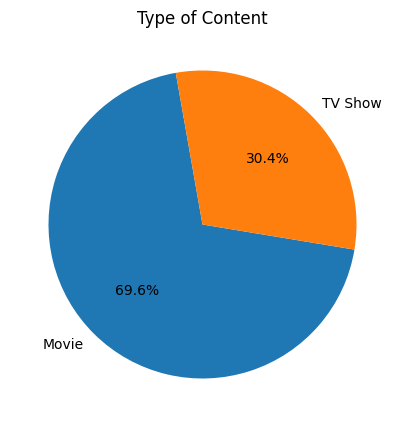

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

type_count = df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(type_count, labels=type_count.index,  autopct='%1.1f%%', startangle=100)
plt.title('Type of Content')
plt.show()

#Count plot: Rating vs Number of TV Show/Movies

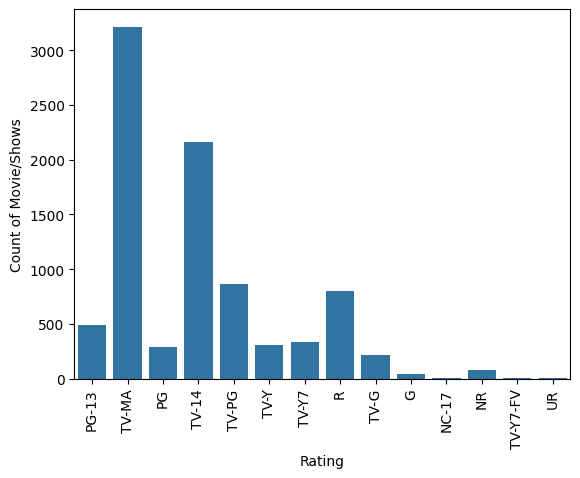

In [ ]:
rating_df = final_df[['rating', 'show_id']].drop_duplicates()
sns.countplot(data=rating_df,x='rating')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Count of Movie/Shows')
plt.show()

#Histogram plot: Distribution of Movie Duration

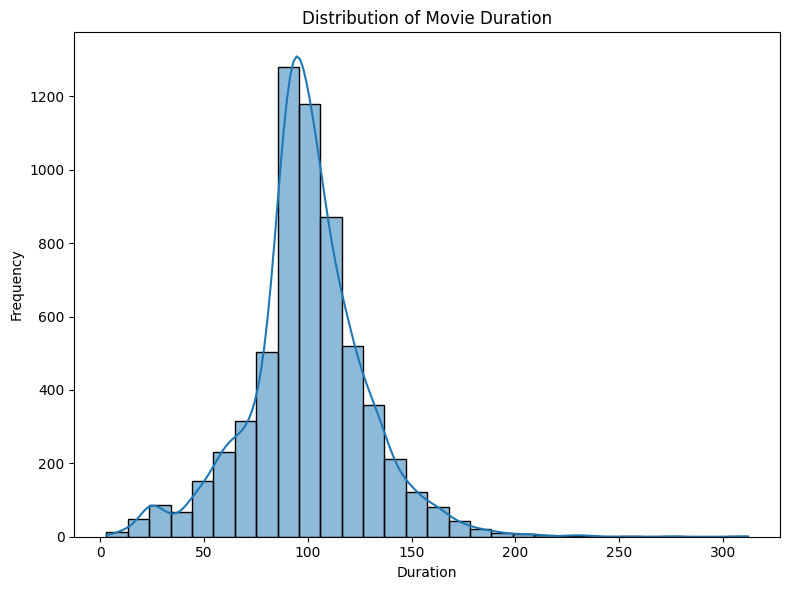

In [ ]:
movies_df = final_df[final_df['type'] == 'Movie']
tv_show_df = final_df[final_df['type'] == 'TV Show']

duration_plt_df = movies_df[['show_id','duration', 'type']].drop_duplicates()

plt.figure(figsize=(8, 6))
sns.histplot(x=duration_plt_df['duration'], bins=30, kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')
plt.tight_layout()
plt.show()

Insight: Most of the movie durations are in between 90-110 mins

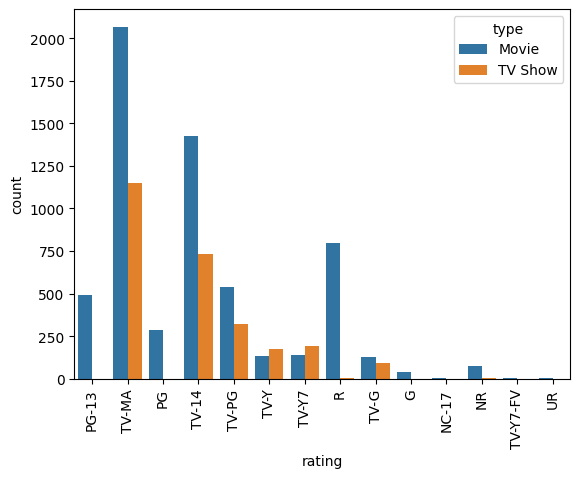

In [ ]:
rating_plt_df = final_df[['rating', 'type', 'show_id']].drop_duplicates()

sns.countplot(data=rating_plt_df, x='rating', hue='type')
plt.xticks(rotation=90)
plt.show()

Insight: Most of the Movies/TV Shows are release in "TV-MA" and 'TV-14"

#Line plot: Distribution of Movies/TV Show for last 10 years

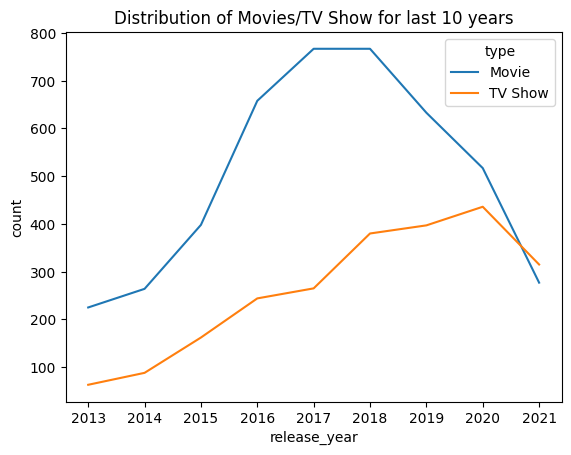

In [ ]:
last_10_yr = final_df['release_year'].sort_values(ascending=False).unique()[0:9].tolist()
data_df = final_df[final_df['release_year'].isin(last_10_yr)][['release_year','show_id','type']]\
.drop_duplicates().groupby(['release_year','type']).count().reset_index()

data_df = data_df.rename(columns={'show_id':'count'})
#data_df
sns.lineplot(data=data_df, x='release_year', y='count', hue='type')
plt.title('Distribution of Movies/TV Show for last 10 years')
plt.show()


Insight: Movie release is reduced over the time. TV show release are increasing over the years.

#Count plot: Distribution of Movies/TV Show Releases by Month

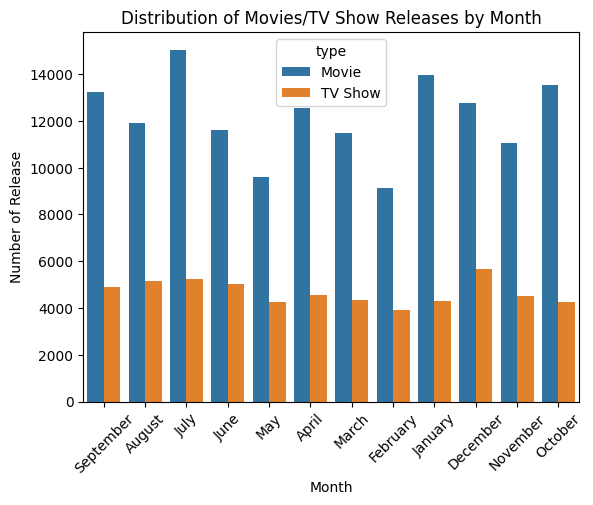

In [ ]:
release_df = final_df
release_df['release_mon'] = release_df['date_added'].dt.strftime('%B')

sns.countplot(data = release_df, x = 'release_mon', hue = 'type')
plt.xlabel('Month')
plt.ylabel('Number of Release')
plt.title('Distribution of Movies/TV Show Releases by Month')
plt.xticks(rotation=45)
plt.show()

Insight: Most of the movies are released in July month and TV Show are relesed in December

#Bar plot: Movie & TV Show Genre distribution

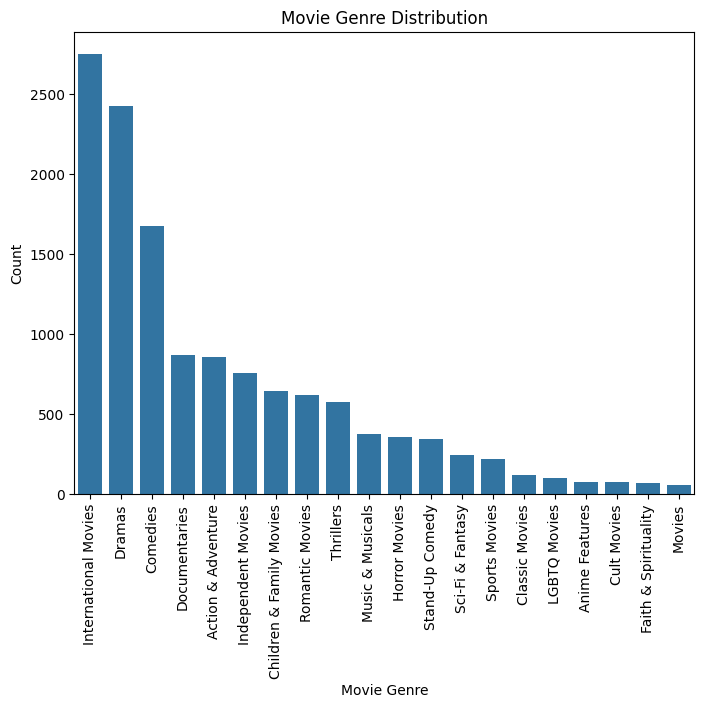

In [ ]:
genere = final_df[['show_id', 'Listed_in', 'type']].drop_duplicates()
movies_df = genere[genere['type'] == 'Movie']
tv_shows_df = genere[genere['type'] == 'TV Show']

movie_genre_cnt = movies_df['Listed_in'].value_counts()
# Plot the bar graph for movie genres
plt.figure(figsize=(8, 6))
sns.barplot(x=movie_genre_cnt.index, y=movie_genre_cnt.values)
plt.xticks(rotation=90)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Distribution')
plt.show()

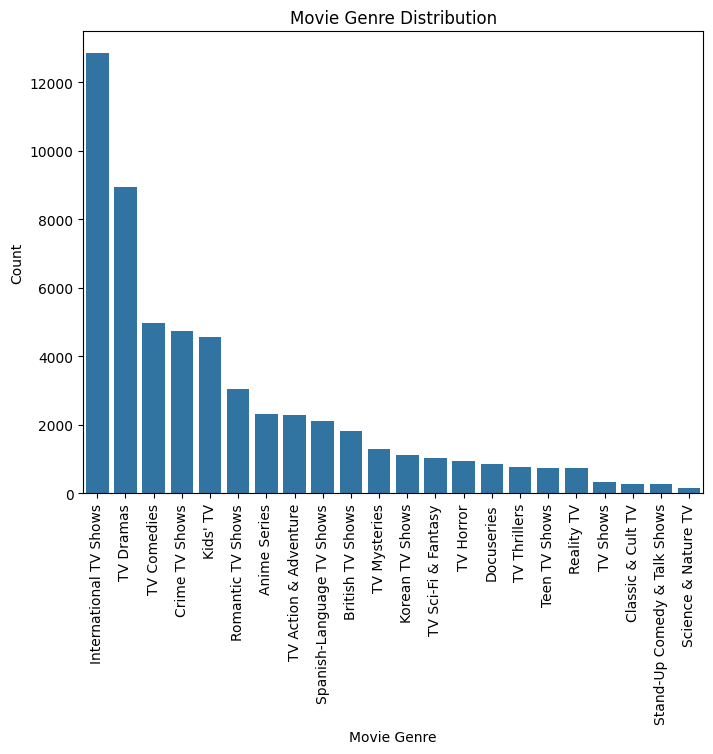

In [ ]:
tv_genre_cnt = tv_show_df['Listed_in'].value_counts()
# Plot the bar graph for movie genres
plt.figure(figsize=(8, 6))
sns.barplot(x = tv_genre_cnt.index, y = tv_genre_cnt.values)
plt.xticks(rotation = 90)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Distribution')
plt.show()

#Box plot: Relationship between relased year and ratiing

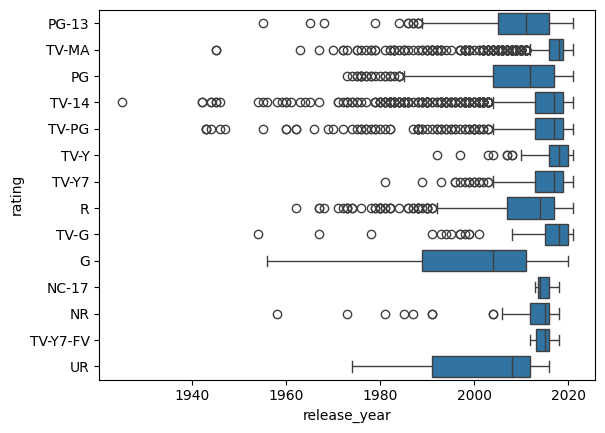

In [ ]:
rating_df = final_df[['rating','release_year', 'show_id']].drop_duplicates()

sns.boxplot(data=rating_df, x='release_year',y='rating')
plt.title('Relationship between relased year and ratiing')
plt.show()


#Heatmap : Correlation Heatmap for Movies

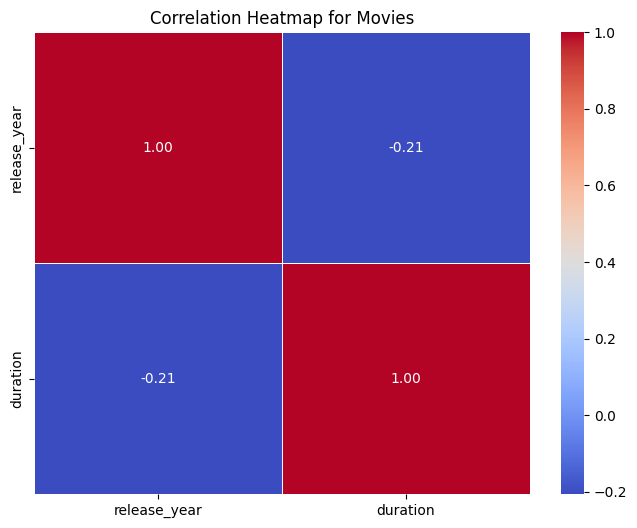

In [ ]:
#heatmap
numerical_df = final_df[final_df['type']=='Movie'][['show_id','release_year', 'duration']]\
.drop_duplicates()[['release_year', 'duration']]
correlation_matrix = numerical_df.corr()

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Movies')
plt.show()

Insight: Over the period of time the duration of the movied is reduced

In [ ]:
print("\n"*20)

#Pair plot: Correlation between the numerical data

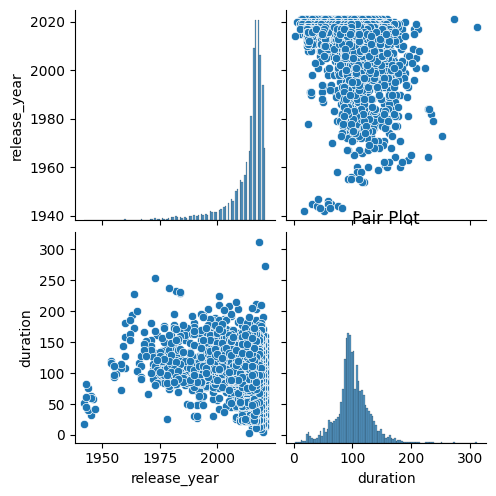

In [ ]:
#pair Plot
sns.pairplot(numerical_df)
plt.title('Pair Plot')
plt.show()

##Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand



*   The United States has the highest number of movies listed on Netflix, followed by India as the second-largest content creator. Increasing the content available from these two countries will provide significant benefits.

*   Best time to release Movies is July and for TV shows is December


*   Best genre to release the TV Show is 'International TV Show'


*   Best genre to release the movies is 'International Movie'


*   90-100 mins is the movie duration to produce














In [ ]:
#End of the Business case study

print("\n"*100)

In [ ]:
print("\n"*100)

In [ ]:
print("\n"*100)

In [ ]:
print("\n"*100)

In [ ]:
print("\n"*10)